## Scikit-learn 

[Scikit-learn](https://scikit-learn.org/) includes a number of features and utilities to kickstart your journey in Machine Learning. 

### A toy example

In [22]:
from sklearn.datasets import make_blobs

In [23]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]), array([0, 0, 0, 1, 1]))

In [25]:
X.shape, y.shape

((1000, 2), (1000,))

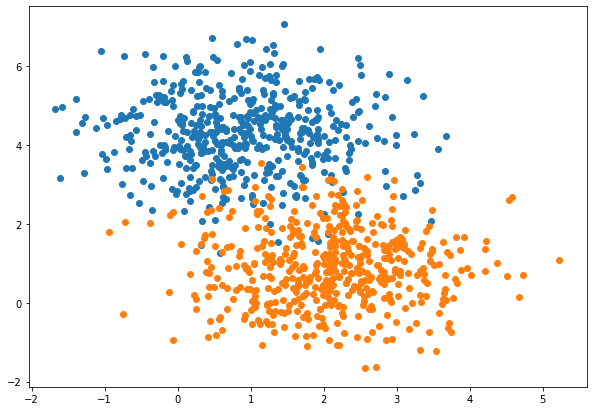

In [30]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
#     print(mask)
    ax.scatter(X[mask, 0], X[mask, 1])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

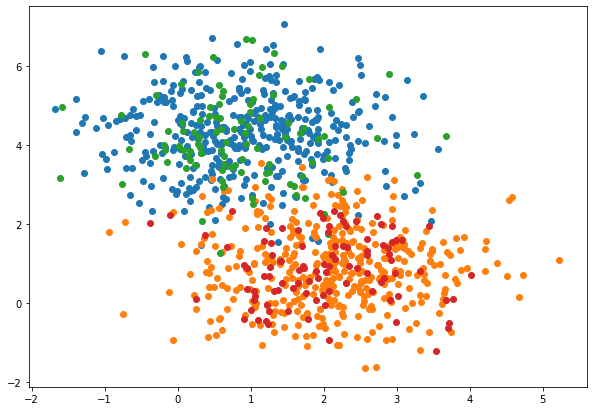

In [35]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 0.9250


In [32]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

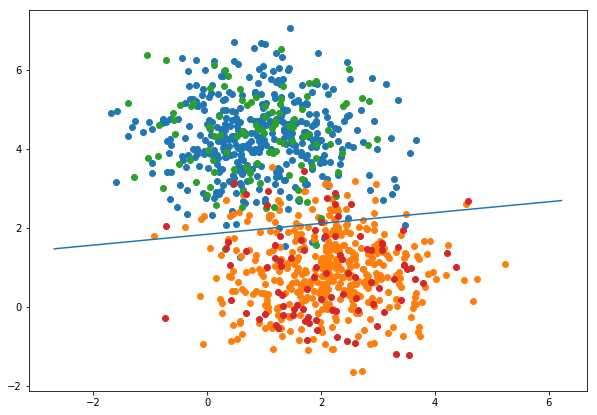

In [33]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)


### Another toy example

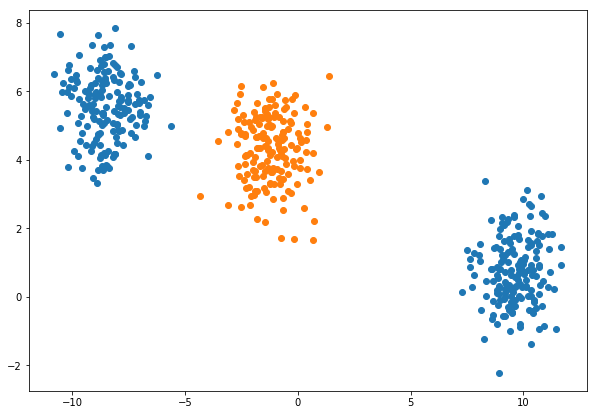

In [34]:
X, y = make_blobs(n_samples=500, centers=3, random_state=7)
y[y==2] = 0
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.svm import SVC
# clf = SVC(kernel="linear", random_state=0)
clf = SVC(kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 1.0000


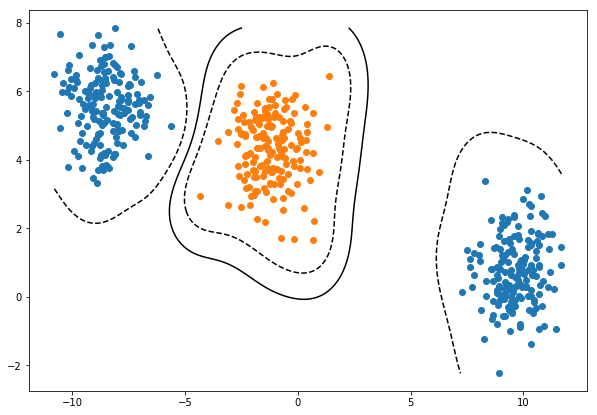

In [38]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
    
Z = Z.reshape(XX.shape)
ax.contour(XX, YY, Z, colors="black",
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

### Classify digits

In [39]:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.datasets import load_digits

In [41]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

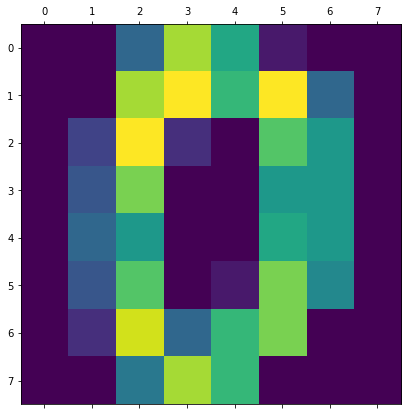

In [42]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])

In [43]:
X_train.shape

(1437, 64)

In [44]:
clf = Perceptron(max_iter=40, random_state=0)

In [45]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


In [46]:
clf = LinearSVC(C=1, random_state=0)

In [47]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9361


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  1, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  2, 36]])

Scikit-learn also includes utilities to quickly compute a cross validation score...

In [50]:
clf = LinearSVC(C=1, random_state=0)
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9443, Std: 0.0127


In [51]:
clf = LinearSVC(C=0.1, random_state=0)
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9555, Std: 0.0101


... or to perform a grid search

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = LinearSVC(random_state=0)
param_grid = {'C': 10. ** np.arange(-6, 4)}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)

In [54]:
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8424657534246576, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8719723183391004, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.9090909090909091, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8426573426573427, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................. C=1e-06, score=0.897887323943662, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ................ C=1e-05, score=0.9075342465753424, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.001, score=0.958904109589041, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9653979238754326, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9788732394366197, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9554794520547946, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9619377162629758, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.5s finished


In [55]:
print(grid_search.best_params_)

{'C': 0.001}


In [56]:
print(grid_search.best_score_)

0.9665970772442589


In [57]:
y_pred = grid_search.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9639


And a lot more features! 
We have only looked at some classification models and some model selection features, but sklearn can also be used for regression, 

## Other packages 

Other packages that didn't make the cut:
- [Plotly](https://plot.ly) and [Seaborn](http://seaborn.pydata.org): two other plotting libraries
- [Scipy](https://www.scipy.org): a science library built on top of Numpy
- [Scrapy](https://www.scipy.org): a web crawling library
- [pdb](https://docs.python.org/3/library/pdb.html): a debugger for python (not ML-specific but terribly useful)
- [tqdm](https://github.com/tqdm/tqdm): a progress bar (not ML-specific)

Next time:
- [Pytorch](https://pytorch.org)